<a href="https://colab.research.google.com/github/sartansartan/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module3-make-explanatory-visualizations/ASartan_LS_DS_123_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [94]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [95]:
df.dtypes

timestamp       object
respondents      int64
category        object
link            object
average        float64
mean           float64
median           int64
1_votes          int64
2_votes          int64
3_votes          int64
4_votes          int64
5_votes          int64
6_votes          int64
7_votes          int64
8_votes          int64
9_votes          int64
10_votes         int64
1_pct          float64
2_pct          float64
3_pct          float64
4_pct          float64
5_pct          float64
6_pct          float64
7_pct          float64
8_pct          float64
9_pct          float64
10_pct         float64
dtype: object

In [0]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [97]:
df.describe()

,respondents,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
count,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000
mean,403.390804,5.331478,5.676954,6.023047,159.455074,11.562103,6.996590,3.211722,7.797684,13.441620,18.832449,17.953256,22.565713,141.574594,37.344919,2.230901,1.726936,1.031519,3.169689,3.504594,4.780199,4.800859,5.978127,35.431905
std,544.977400,1.673279,1.602680,3.131885,227.154951,16.120869,8.964425,4.267118,10.633648,19.326537,26.799409,25.398818,28.591822,187.954673,20.080097,2.444295,1.620233,1.438929,3.903391,4.137329,3.798714,5.224808,5.759520,15.814088
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,4.300000,4.800000,3.000000,6.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,6.000000,25.000000,0.000000,0.000000,0.000000,0.800000,1.200000,2.200000,2.600000,3.600000,26.300000
50%,244.000000,5.300000,5.500000,6.000000,81.000000,3.000000,4.000000,2.000000,4.000000,6.000000,8.000000,10.000000,16.000000,85.000000,38.600000,2.000000,1.500000,0.600000,1.700000,2.900000,4.200000,4.300000,5.300000,35.500000
75%,518.000000,6.500000,6.600000,9.000000,227.000000,20.000000,10.000000,5.000000,10.000000,19.000000,26.000000,24.000000,32.000000,188.000000,46.000000,3.200000,2.200000,1.400000,3.600000,4.300000,6.800000,5.300000,6.400000,45.100000
max,2662.000000,8.500000,8.600000,10.000000,1021.000000,69.000000,40.000000,25.000000,55.000000,110.000000,154.000000,147.000000,146.000000,897.000000,100.000000,10.300000,9.100000,8.600000,25.000000,50.000000,25.000000,28.600000,33.300000,82.800000


In [98]:
df.dtypes

timestamp      datetime64[ns]
respondents             int64
category               object
link                   object
average               float64
mean                  float64
median                  int64
1_votes                 int64
2_votes                 int64
3_votes                 int64
4_votes                 int64
5_votes                 int64
6_votes                 int64
7_votes                 int64
8_votes                 int64
9_votes                 int64
10_votes                int64
1_pct                 float64
2_pct                 float64
3_pct                 float64
4_pct                 float64
5_pct                 float64
6_pct                 float64
7_pct                 float64
8_pct                 float64
9_pct                 float64
10_pct                float64
dtype: object

In [99]:
df['timestamp'].min()

Timestamp('2017-07-17 12:28:32.785639')

In [100]:
df['timestamp'].max()

Timestamp('2017-08-29 23:10:06.218251')

In [0]:
df = df.set_index('timestamp')

In [102]:
df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
lastday = df['2017-08-29']
lastday_filtered = lastday[lastday['category'] == 'IMDb users']

In [104]:
lastday_filtered.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:06.288486,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:10:06.763461,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:20:05.745307,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:30:05.818552,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:40:06.180928,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7


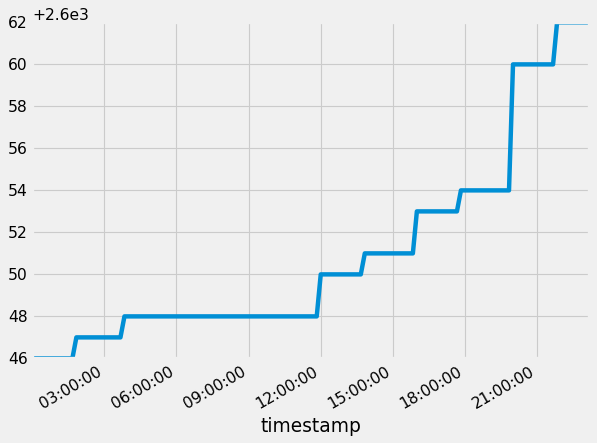

In [105]:
lastday_filtered['respondents'].plot()

In [106]:
lastday_filtered['category'].value_counts()

IMDb users    140
Name: category, dtype: int64

In [107]:
pct_columns = [f'{i}_pct' for i in range (1,11)]
pct_columns

['1_pct',
 '2_pct',
 '3_pct',
 '4_pct',
 '5_pct',
 '6_pct',
 '7_pct',
 '8_pct',
 '9_pct',
 '10_pct']

In [108]:
final = lastday_filtered.tail(1)
final

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [109]:
plot_data = final[pct_columns].T
plot_data.index = range(1,11)
plot_data

timestamp,2017-08-29 23:10:06.218251
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


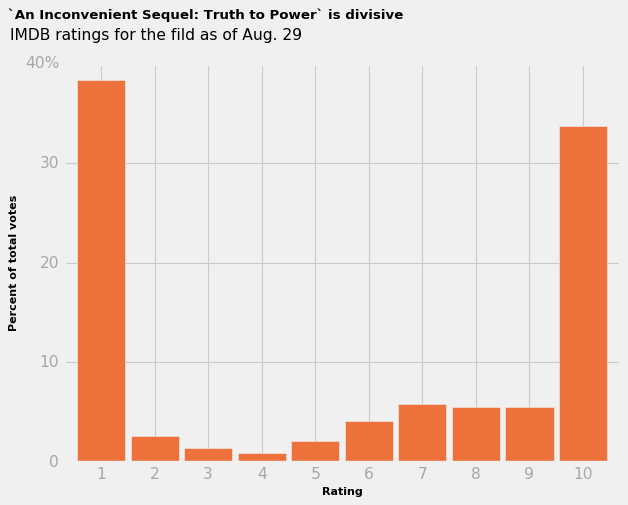

In [110]:
plt.style.use('fivethirtyeight')

ax = plot_data.plot.bar(color = '#ed713a', width = 0.9 )
plt.xlabel('Rating', fontsize = 10, fontweight='bold')
plt.ylabel('Percent of total votes', fontsize=10, fontweight='bold')
plt.title('`An Inconvenient Sequel: Truth to Power` is divisive', 
          fontsize=12,
          x=-0.1, y=1.1, loc='left',
          fontweight='bold')
plt.text(x=-1.7, y=plot_data.max()+4, s='IMDB ratings for the fild as of Aug. 29')
plt.xticks(rotation=0, color='#a7a7a7')
plt.yticks(range(0, 50, 10), labels =[f'{i}' if i!=40 else f'{i}%' for i in range(0, 50, 10)], color='#a7a7a7');
legend = ax.legend()
legend.remove()


In [111]:
#Reproducing https://fivethirtyeight.com/features/american-chess-is-great-again/ graph

from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2017/08/roeder-uschess-1.png?w=1024'
example = Image(url=url, width=400)

display(example)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0585676037483267, 'Number of transfers')

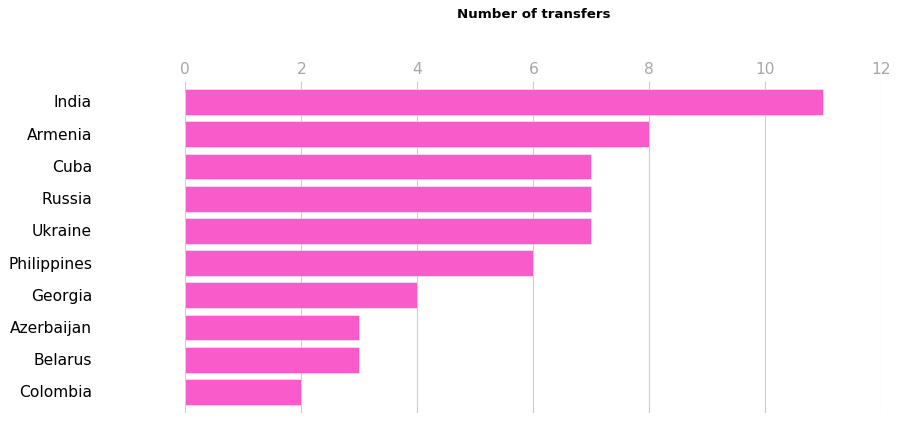

In [158]:
#Picking a style

plt.style.use('fivethirtyeight')

#setting frame color and figure size
fig = plt.figure(facecolor='white', figsize=(10, 5))

#Creating a fake data from an example

fake = pd.Series([11, 8, 7, 7, 7, 6, 4, 3, 3, 2], index=range(0,10))

#creating a plot
fake.plot.barh(color ='#f95cca', width=0.8)
bars = ('India', 'Armenia', 'Cuba', 'Russia', 'Ukraine', 'Philippines', 'Georgia', 'Azerbaijan', 'Belarus', 'Colombia')
plt.yticks(range(0,10), bars);

#adding axis
ax = plt.axes()
ax.yaxis.grid()
ax.set(facecolor='white');
plt.box(on=None) #removing a bounding box around the plot

#Inverting tha table and moving x-axis to the top
ax.invert_yaxis()
ax.xaxis.tick_top()

#Adding a color of x ticks
plt.xticks(color='#a7a7a7')

#Adding left alignment and spacing for yticks
plt.draw()  # this is needed because get_window_extent needs a renderer to work
yax = ax.get_yaxis()
# find the maximum width of the label on the major ticks
pad = max(T.label.get_window_extent().width for T in yax.majorTicks)
yax.set_tick_params(pad=pad)

#Adding a title with a pad
ax.set_title('Number of transfers', pad=40, fontsize=12, fontweight='bold')


# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [160]:
df = pd.read_excel('halloween candy.xlsx')
df.head()

,RK,CANDY,WIN PERCENTAGE
0,1,Reese’s Peanut Butter Cup,84.2
1,2,Reese’s Miniatures,81.9
2,3,Twix,81.6
3,4,Kit Kat,76.8
4,5,Snickers,76.7


In [0]:
import seaborn as sns

In [177]:
df2 = df[['CANDY', 'WIN PERCENTAGE']]
df2.head()

,CANDY,WIN PERCENTAGE
0,Reese’s Peanut Butter Cup,84.2
1,Reese’s Miniatures,81.9
2,Twix,81.6
3,Kit Kat,76.8
4,Snickers,76.7


AttributeError: ignored

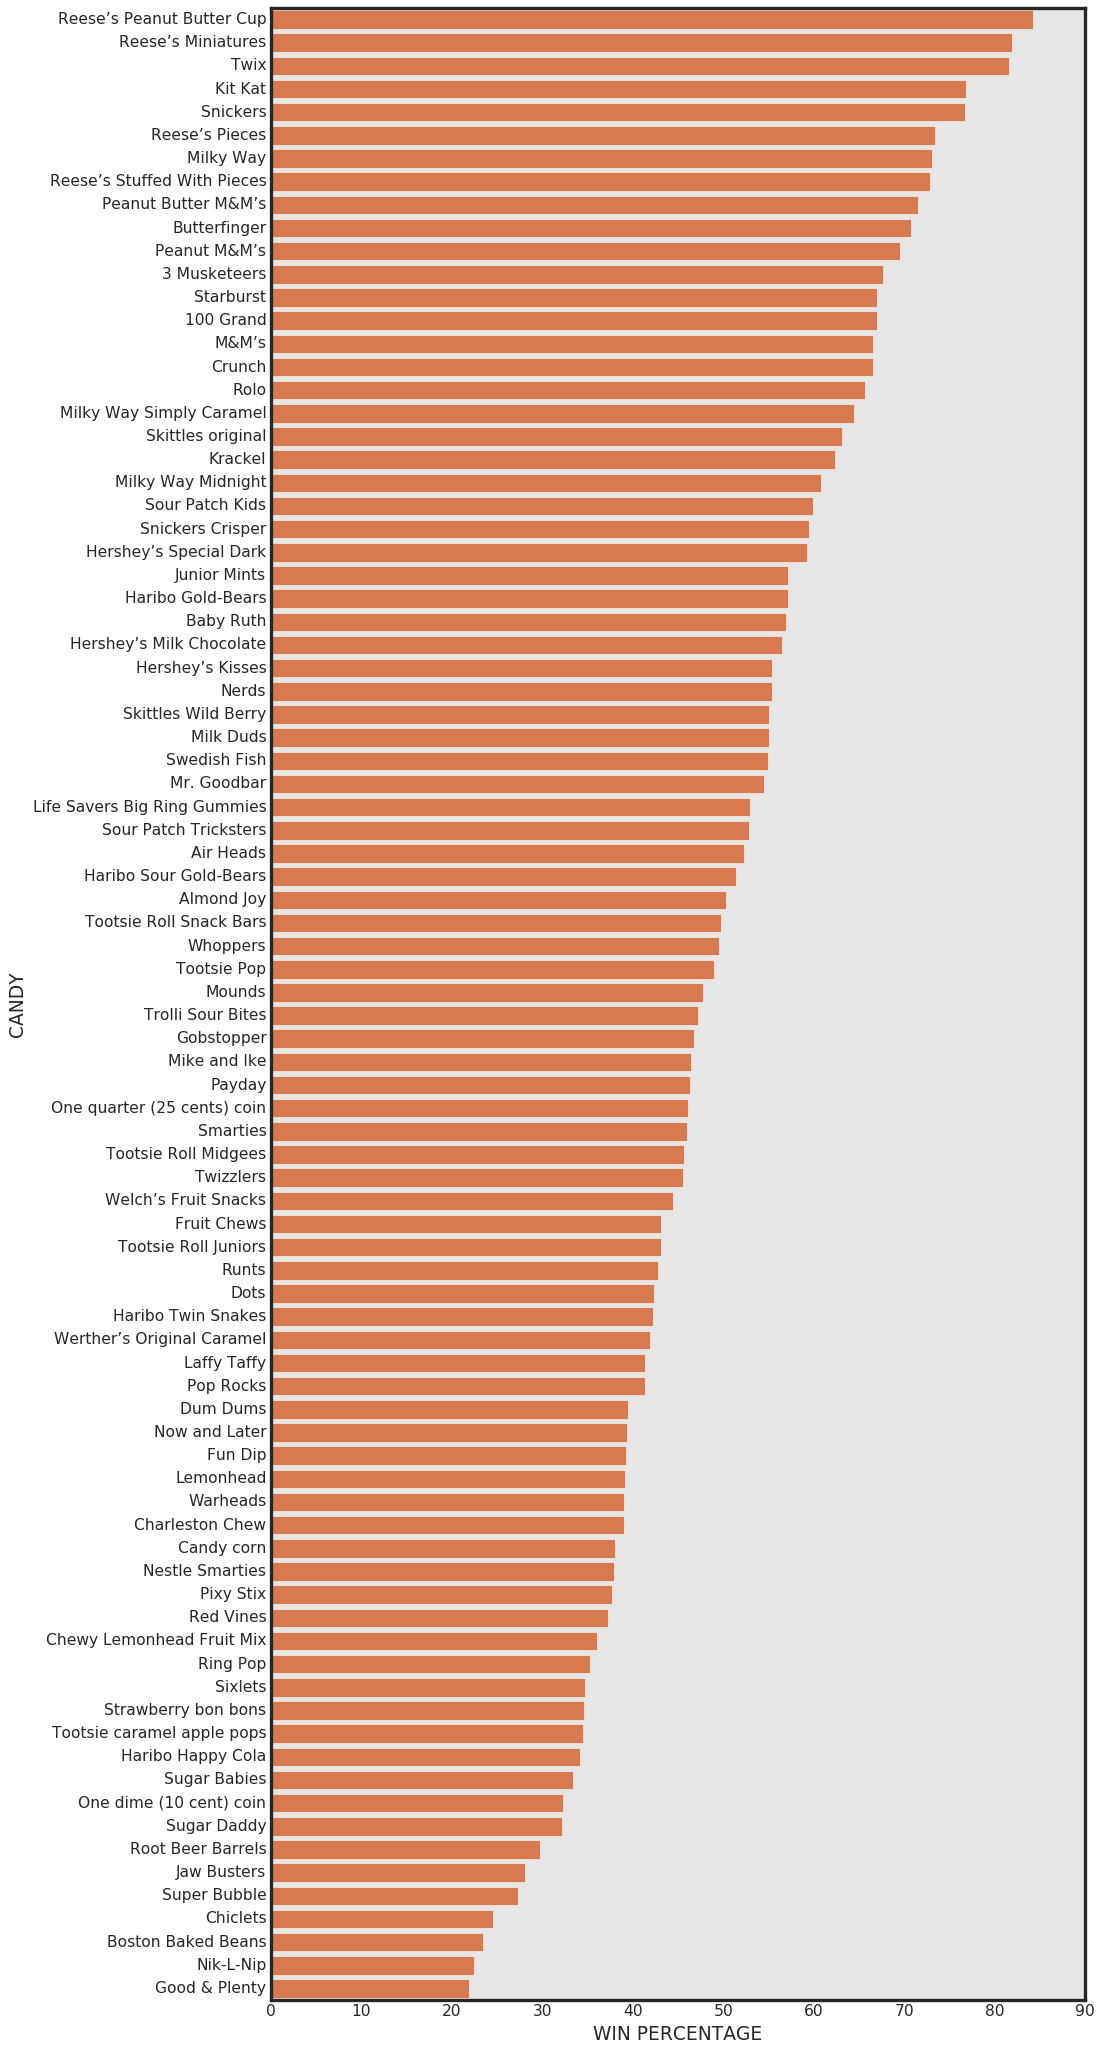

In [214]:
sns.set_style("white", {"axes.facecolor": ".9"})

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,30

ax = sns.barplot(x="WIN PERCENTAGE", y="CANDY", data=df, color='#ed713a')

labels = df['CANDY']

ax.set_yticklabels(labels, ha='right')


In [0]:
from matplotlib.widgets import Slider

In [194]:
import matplotlib.pyplot as plt
from PyQt4 import QtGui
from matplotlib.backends.backend_qt4agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.backends.backend_qt4agg import NavigationToolbar2QT as NavigationToolbar

class ScrollableWindow(QtGui.QMainWindow):
    def __init__(self, fig):
        self.qapp = QtGui.QApplication([])

        QtGui.QMainWindow.__init__(self)
        self.widget = QtGui.QWidget()
        self.setCentralWidget(self.widget)
        self.widget.setLayout(QtGui.QVBoxLayout())
        self.widget.layout().setContentsMargins(0,0,0,0)
        self.widget.layout().setSpacing(0)

        self.fig = fig
        self.canvas = FigureCanvas(self.fig)
        self.canvas.draw()
        self.scroll = QtGui.QScrollArea(self.widget)
        self.scroll.setWidget(self.canvas)

        self.nav = NavigationToolbar(self.canvas, self.widget)
        self.widget.layout().addWidget(self.nav)
        self.widget.layout().addWidget(self.scroll)

        self.show()
        exit(self.qapp.exec_()) 


# create a figure and some subplots
fig, axes = plt.subplots(ncols=4, nrows=5, figsize=(16,16))
for ax in axes.flatten():
    ax.plot([2,3,5,1])

# pass the figure to the custom window
a = ScrollableWindow(fig)

ModuleNotFoundError: ignored